## **DESCRIPTION**
Diabetes is a type of chronic disease which is more common among the 
people of all age groups. Predicting this disease at an early stage can help 
a person to take the necessary
accordingly to either prevent the occurance of
disease(For people who Already have Disease)
## *Task:*
1. Prepare the data-set
2. Build a model which can give high accuracy of predicting the disease.






In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("diabetes.csv")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.DiabetesPedigreeFunction

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.Outcome


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

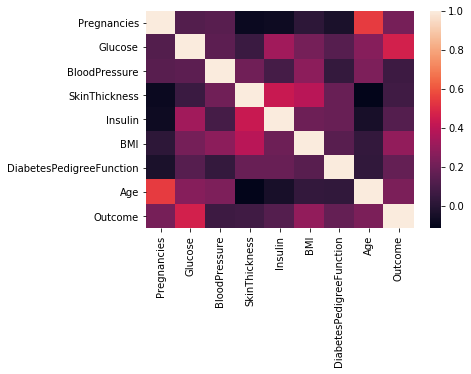

In [8]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

<function matplotlib.pyplot.show(*args, **kw)>

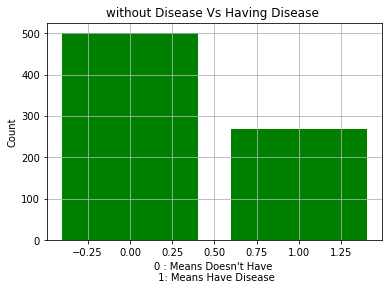

In [9]:
plt.xlabel("0 : Means Doesn't Have \n 1: Means Have Disease")
plt.ylabel("Count")
plt.title("without Disease Vs Having Disease ")
plt.grid(True)
c=pd.value_counts(df["Outcome"])
x=pd.DataFrame(c,columns=['Outcome','Count'] )
plt.bar(x.index,x.Outcome,color="Green")
plt.show

In [10]:
from sklearn.model_selection import train_test_split
train_x ,test_x ,train_y ,test_y = train_test_split(df[["DiabetesPedigreeFunction","Age","BMI","BloodPressure","Glucose","Pregnancies","SkinThickness","Insulin"]],df.Outcome,test_size=0.2,random_state=0)

In [11]:
train_x.head()

,DiabetesPedigreeFunction,Age,BMI,BloodPressure,Glucose,Pregnancies,SkinThickness,Insulin
603,0.692,54,35.2,78,150,7,29,126
118,0.443,22,28.2,60,97,4,23,0
247,0.427,23,52.3,90,165,0,33,680
157,0.833,23,25.2,56,109,1,21,135
468,0.183,38,30.0,0,120,8,0,0


In [12]:
test_x

,DiabetesPedigreeFunction,Age,BMI,BloodPressure,Glucose,Pregnancies,SkinThickness,Insulin
661,1.394,22,42.9,76,199,1,43,0
122,0.404,23,33.6,74,107,2,30,100
113,0.391,25,34.0,62,76,4,0,0
14,0.587,51,25.8,72,166,5,19,175
529,0.660,31,24.6,65,111,0,0,0
...,...,...,...,...,...,...,...,...
476,0.711,29,33.7,80,105,2,45,191
482,0.306,28,27.8,58,85,4,22,49
230,0.645,22,44.0,86,142,4,0,0
527,0.107,24,26.3,74,116,3,15,105


In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() 

In [14]:
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
model.predict(test_x)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [16]:
print(test_y)

661    1
122    0
113    0
14     1
529    0
      ..
476    1
482    0
230    1
527    0
380    0
Name: Outcome, Length: 154, dtype: int64


In [17]:
print("Accuracy Of Model ",100*model.score(train_x,train_y),"%")

Accuracy Of Model  77.19869706840392 %


In [18]:
print("Let's Predict For the set of for 661th Coloumn of dataset")
print(df[661:662])
print("Actual OutCome :",df.Outcome[661:662])
print("Predicted By Model :",model.predict([[1.394,	22,	42.9,	76,	199,	1,	43,	0]]))

Let's Predict For the set of for 661th Coloumn of dataset
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
661            1      199             76             43        0  42.9   

     DiabetesPedigreeFunction  Age  Outcome  
661                     1.394   22        1  
Actual OutCome : 661    1
Name: Outcome, dtype: int64
Predicted By Model : [1]


In [19]:
model.predict(test_x[:1])

array([1], dtype=int64)

In [20]:
test_y[:1]

661    1
Name: Outcome, dtype: int64